<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/05_embeddings/gensim_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings y similaridad

Vamos a usar GenSim, una librería para topic modelling pero que la utilizaremos más que nada para acceder a los vectores

In [1]:
%%capture
!pip install gensim sklearn 

In [2]:
import gensim.downloader as api

api.info().keys()

dict_keys(['corpora', 'models'])

In [ ]:
api.info()["models"].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

Ninguno en español :-(

Empecemos con GloVe

In [ ]:
model = api.load("glove-wiki-gigaword-300")  # load glove vectors

Veamos el vocabulario que tiene

In [ ]:
len(model.key_to_index), model.key_to_index

(400000,
 {'the': 0,
  ',': 1,
  '.': 2,
  'of': 3,
  'to': 4,
  'and': 5,
  'in': 6,
  'a': 7,
  '"': 8,
  "'s": 9,
  'for': 10,
  '-': 11,
  'that': 12,
  'on': 13,
  'is': 14,
  'was': 15,
  'said': 16,
  'with': 17,
  'he': 18,
  'as': 19,
  'it': 20,
  'by': 21,
  'at': 22,
  '(': 23,
  ')': 24,
  'from': 25,
  'his': 26,
  "''": 27,
  '``': 28,
  'an': 29,
  'be': 30,
  'has': 31,
  'are': 32,
  'have': 33,
  'but': 34,
  'were': 35,
  'not': 36,
  'this': 37,
  'who': 38,
  'they': 39,
  'had': 40,
  'i': 41,
  'which': 42,
  'will': 43,
  'their': 44,
  ':': 45,
  'or': 46,
  'its': 47,
  'one': 48,
  'after': 49,
  'new': 50,
  'been': 51,
  'also': 52,
  'we': 53,
  'would': 54,
  'two': 55,
  'more': 56,
  "'": 57,
  'first': 58,
  'about': 59,
  'up': 60,
  'when': 61,
  'year': 62,
  'there': 63,
  'all': 64,
  '--': 65,
  'out': 66,
  'she': 67,
  'other': 68,
  'people': 69,
  "n't": 70,
  'her': 71,
  'percent': 72,
  'than': 73,
  'over': 74,
  'into': 75,
  'last': 76

Tiene 400k palabras

Busquemos las palabras más similares a otras.

In [ ]:
import numpy as np

def cossim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


banana = model.get_vector("banana") 
pineapple = model.get_vector("pineapple")
tree = model.get_vector("tree")
star = model.get_vector("star")

print(f"Similaridad banana - pineapple: {cossim(banana, pineapple):.4f}")
print(f"Similaridad banana - tree: {cossim(banana, tree):.4f}")
print(f"Similaridad banana - star: {cossim(banana, star):.4f}")

Similaridad banana - pineapple: 0.5492
Similaridad banana - tree: 0.3496
Similaridad banana - star: 0.0333


Bien, algo hay acá

In [ ]:
def most_similar(word, top=10):

    TODO: completar
    """
    dists = []
    for other_word in model.key_to_index:
        pass
    # Skip the first
    top = sorted(dists, key=lambda x: x[1], reverse=True)[:top+1]

    if skip_first:
        top = top[1:]

    return [x[0] for x in top]

In [ ]:
most_similar("obama")

['barack',
 'mccain',
 'bush',
 'clinton',
 'hillary',
 'kerry',
 'rodham',
 'biden',
 'gore',
 'democrats']

In [ ]:
most_similar("messi")

["eto'o",
 'ronaldinho',
 'iniesta',
 'ronaldo',
 'xavi',
 'tevez',
 'barca',
 'ibrahimovic',
 'saviola',
 'riquelme']

In [ ]:
most_similar('germany')

['german',
 'austria',
 'berlin',
 'europe',
 'munich',
 'poland',
 'switzerland',
 'germans',
 'denmark',
 'france']

## Analogías

Programar la función de analogías, que intenta 

Chequear en algunos ejemplos: "man is to king, as woman is to ..."


In [ ]:
def analogy(x1, x2, y1):
    # Codear
    x1_vec = model.get_vector(x1)
    x2_vec = model.get_vector(x2)
    y1_vec = model.get_vector(y1)

    top = most_similar(x2_vec - x1_vec + y1_vec)

    return next(t for t in top if t not in {x1, x2, y1})

In [ ]:
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
analogy('australia', 'beer', 'france')

'champagne'

In [ ]:
analogy('obama', 'clinton', 'reagan')

'ronald'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'horrible'

In [ ]:
analogy("man", "medic", "woman")

'nurse'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

def display_pca_scatterplot(model, words=None, sample=0, figsize=(10, 10)):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=figsize)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

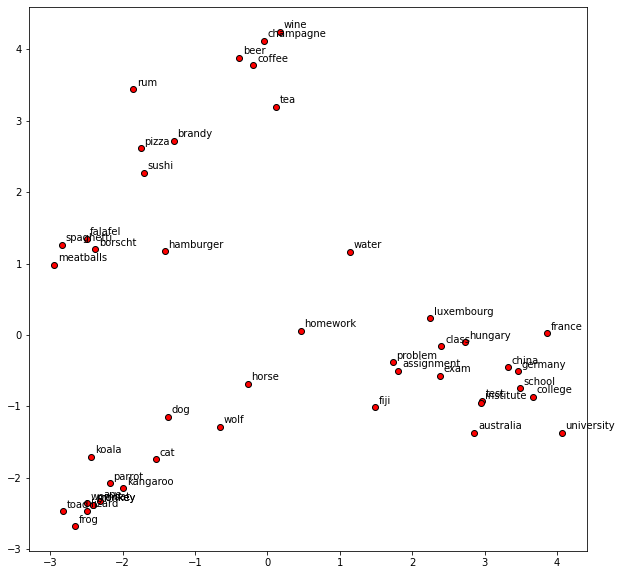

In [ ]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

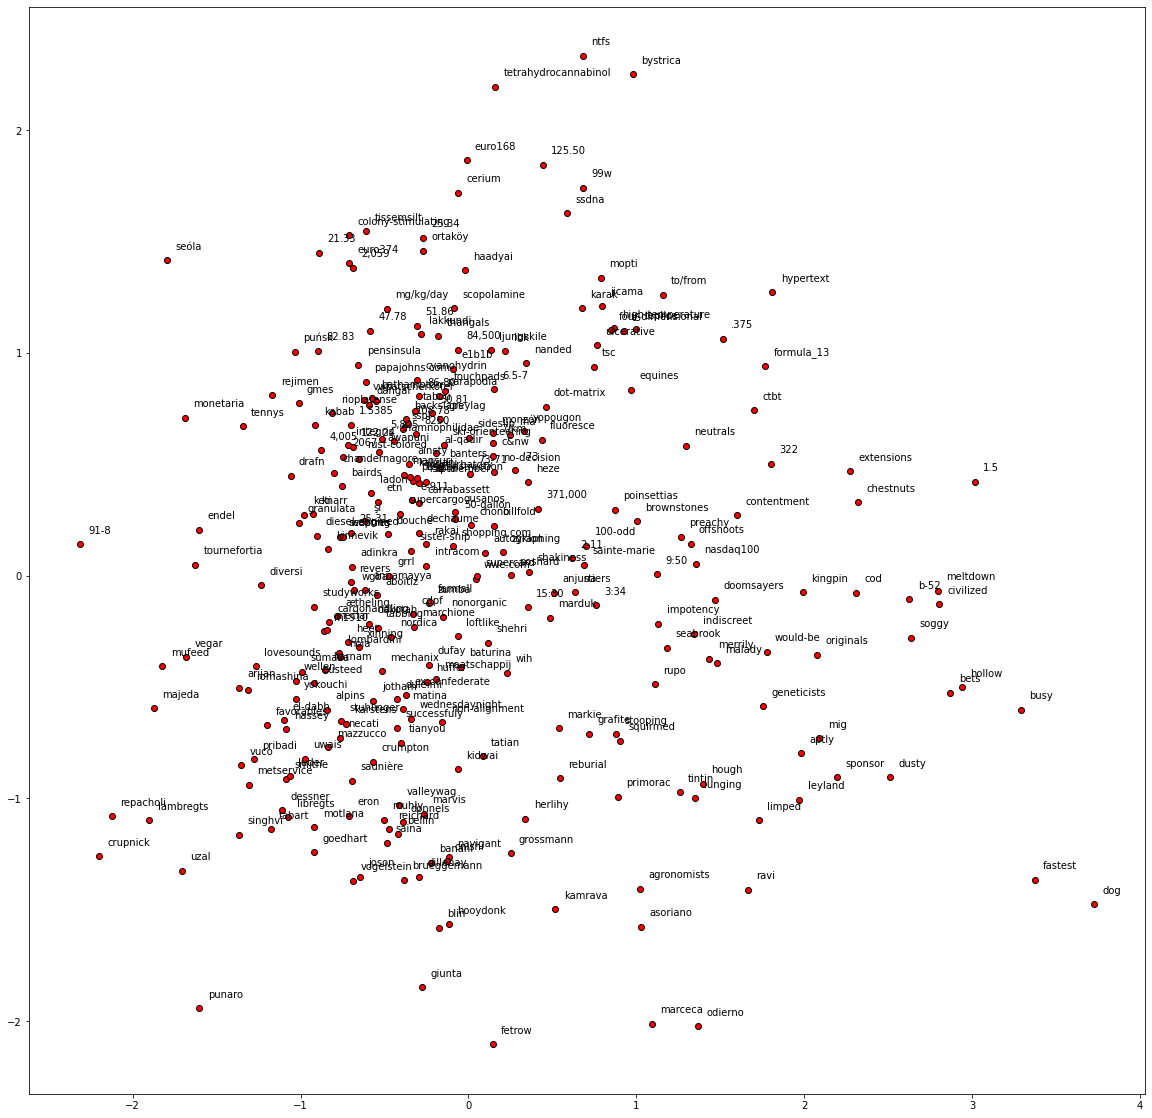

In [ ]:
display_pca_scatterplot(model, sample=300, figsize=(20, 20))